# Perdas de Comutação e Condução
## Disciplina de Modulação - Profº Humberto Pinheiro - 2019/2
**Autor:** Tiarles da Rocha Moralles Guterres (Engenheiro de Computação (UFSM))

**Parte 1.a** - Obtenção das curvas características de funcionamento do componente a partir de amostras de energia obtidas no LTSpice XVII

Dados de simulação do arquivo ``Abaixador_rv00.asc``:
* **Ferramenta:** LTSpice XVII
* **Componente:** MOSFET IRFH5207

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from halfBridgeModule import getPolyFromPoints

### 1. Listas com os valores obtidos pelo LTSpice de energia

In [3]:
currentValues = [6, 10, 12, 30, 50, 70]

energyOn   = [2.102, 3.508, 4.462, 10.559, 26.519, 46.421]
energyOff  = [0.649, 1.185, 1.517,  5.007,  8.472, 13.145]
energyRec  = [0.615, 1.194, 1.516,  5.029,  9.695, 15.075]
energyD_On = [0.213, 0.362, 1.273,  3.805,  8.212, 11.477]

### 2. Obtenção dos parâmetros e dos polinômios

In [4]:
# p_energyOn   = np.poly1d(np.polyfit(currentValues, energyOn, 3))
# p_energyOff  = np.poly1d(np.polyfit(currentValues, energyOff, 3))
# p_energyRec  = np.poly1d(np.polyfit(currentValues, energyRec, 3))
# p_energyD_On = np.poly1d(np.polyfit(currentValues, energyD_On, 3))

p_energyOn   = getPolyFromPoints(currentValues, energyOn, 3)
p_energyOff  = getPolyFromPoints(currentValues, energyOff, 3)
p_energyRec  = getPolyFromPoints(currentValues, energyRec, 3)
p_energyD_On = getPolyFromPoints(currentValues, energyD_On, 3)

#### Sobre as funções np.poly1d e np.polyfit

In [5]:
# np.polyfit(x, y, deg)
#
# x : array_like, shape (M,)
#    x-coordinates of the M sample points ``(x[i], y[i])``.
# y : array_like, shape (M,) or (M, K)
#    y-coordinates of the sample points. Several data sets of sample
#    points sharing the same x-coordinates can be fitted at once by
#    passing in a 2D-array that contains one dataset per column.
# deg : int
#    Degree of the fitting polynomial

# np.poly1d(c_or_r, r=False, variable=None)
#
# c_or_r : array_like
#    The polynomial's coefficients, in decreasing

### 3. Plot dos polinômios gerados

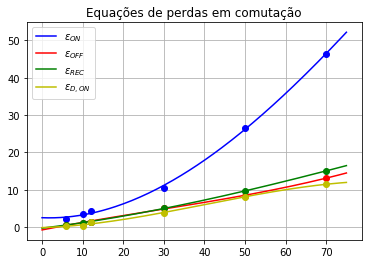

In [6]:
current = np.linspace(0, 75, 75*2)

plt.plot(current, p_energyOn(current), 'b-', label='$\epsilon_{ON}$')
plt.plot(currentValues, energyOn, 'bo ')
plt.plot(current, p_energyOff(current), 'r-', label='$\epsilon_{OFF}$')
plt.plot(currentValues, energyOff, 'ro ')
plt.plot(current, p_energyRec(current), 'g-', label='$\epsilon_{REC}$')
plt.plot(currentValues, energyRec, 'go ')
plt.plot(current, p_energyD_On(current), 'y-', label='$\epsilon_{D, ON}$')
plt.plot(currentValues, energyD_On, 'yo ')
plt.legend()
plt.title('Equações de perdas em comutação')
plt.grid()
plt.show()

### 4. Salvando equações num ``pickle`` para uso em outro script

In [7]:
import pickle

to_save = {'eon': p_energyOn, 'eoff': p_energyOff, 'erec': p_energyRec, 'eDon': p_energyD_On}

with open('models\\IRFH5207.pklmod', 'wb') as filep:
    pickle.dump(to_save, filep)